#### Generación de una onda 

La idea es ver cómo generar una onda de la frecuencia que queremos, teniendo en cuenta una frecuencia de sampleo fija y jugando con el número de puntos, la amplitud, frecuencia y tiempo de ejecución, deseados.

In [72]:
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal as sg

In [2]:
sd.default.samplerate = 11025*4 
print(sd.default.samplerate)

44100


150


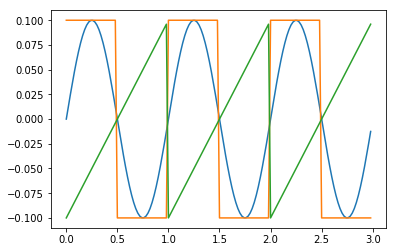

In [86]:
f=1 #frecuencia de la señal a emitirriang
N=50 #número de puntos por período
n=3 #número de períodos
A=.1

t = np.linspace(0,n*np.divide(1,f),n*N,endpoint=False) # valores de tiempo que van a ser barridos.
y=A*np.sin(2*np.pi*t)
w=A*sg.square(2*np.pi*t)
z=A*sg.sawtooth(2*np.pi*t)
print(y.size)
plt.plot(t,y,t,w,t,z)

#sd.play(y)

In [67]:
def Senoidal(Ampl,Freq,nPeriods):
    n=nPeriods
    SR = sd.default.samplerate
    print(SR)
    t = np.linspace(0,n*np.divide(1,Freq),n*int(np.divide(SR,Freq)),endpoint=False) # valores de tiempo que van a ser barridos.
    return t,Ampl*np.sin(2*np.pi*Freq*t)

def PlaySin(Ampl,Freq,Time):
    t,y=Senoidal(Ampl,Freq,1)
    sd.play(y,loop=True)
    time.sleep(Time)
    sd.stop()

44100


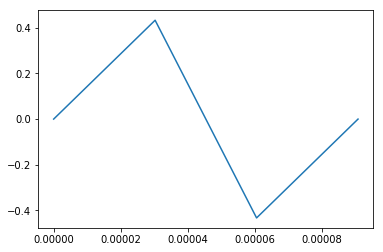

In [127]:
t,y=Senoidal(.5,11025,1)
plt.plot(t,y)

sd.play(y,loop=True)

In [126]:
sd.stop()

In [137]:
sd.default.extra_settings

[None, None]

In [97]:
n=[261.6,293.7,329.6,349.2,392,440,493.2]
for i in n:
    print(i)
    t,y=Senoidal(.2,i,int(i*100/261.6))
    sd.play(y,blocking=True)

261.6
44100
293.7
44100
329.6
44100
349.2
44100
392
44100
440
44100
493.2
44100


In [70]:
n=[261.6,293.7,329.6,349.2,392,440,493.2]
for i in n:
    print(i)
    PlaySin(.05,i,1)


261.6
44100
293.7
44100
329.6
44100
349.2
44100
392
44100
440
44100
493.2
44100


In [69]:
sd.stop()

In [ ]:
sg.triang()